In [1]:
#importing all the required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from bs4 import BeautifulSoup

from tqdm import tqdm
import os
import nltk
import random,re,string
import numpy as np

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#importing edited dataset
train = pd.read_csv('data4.csv')
test = pd.read_csv('data5.csv')

In [3]:
#preview of training dataset
train.head()

,rating,title,desc
0,5,Inspiring,I hope a lot of people hear this cd. We need m...
1,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
3,5,Too good to be true,Probably the greatest soundtrack in history! U...
4,5,There's a reason for the price,"There's a reason this CD is so expensive, even..."


In [4]:
#preview of testing dataset
test.head()

,rating,title,desc
0,1,mens ultrasheer,"This model may be ok for sedentary types, but ..."
1,4,Surprisingly delightful,This is a fast read filled with unexpected hum...
2,2,"Works, but not as advertised",I bought one of these chargers..the instructio...
3,2,Oh dear,I was excited to find a book ostensibly about ...
4,2,Incorrect disc!,"I am a big JVC fan, but I do not like this mod..."


In [5]:
#combining both to make model better at working
train = pd.concat([train,test])

In [6]:
#newly obtained df shape
train.shape

(3649999, 3)

In [7]:
#preview of newly obtained df
train.head()

,rating,title,desc
0,5,Inspiring,I hope a lot of people hear this cd. We need m...
1,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
3,5,Too good to be true,Probably the greatest soundtrack in history! U...
4,5,There's a reason for the price,"There's a reason this CD is so expensive, even..."


In [8]:
#combining description and title of reviews
train['desc'] = train.title + ' ' + train.desc

In [9]:
train.head()

,rating,title,desc
0,5,Inspiring,Inspiring I hope a lot of people hear this cd....
1,5,The best soundtrack ever to anything.,The best soundtrack ever to anything. I'm read...
2,4,Chrono Cross OST,Chrono Cross OST The music of Yasunori Misuda ...
3,5,Too good to be true,Too good to be true Probably the greatest soun...
4,5,There's a reason for the price,There's a reason for the price There's a reaso...


In [10]:
train.shape

(3649999, 3)

In [11]:
#deleting non-required columns
del train['title']

In [12]:
#preview of df on which we will finally work
train.head()

,rating,desc
0,5,Inspiring I hope a lot of people hear this cd....
1,5,The best soundtrack ever to anything. I'm read...
2,4,Chrono Cross OST The music of Yasunori Misuda ...
3,5,Too good to be true Probably the greatest soun...
4,5,There's a reason for the price There's a reaso...


In [13]:
#removing reviews with neutral sentiment
train = train[train.rating != 3]

In [14]:
#freq. of rest of reviews inn terms of rating
train.rating.value_counts()

5    730000
4    730000
1    730000
2    730000
Name: rating, dtype: int64

In [15]:
#naming reviews with 1 and 2 rating as negative review while those with rating of 4 and 5 are termed as positive
train.rating = train.rating.replace([1,2,4,5],[0,0,1,1])

<AxesSubplot:xlabel='rating', ylabel='count'>

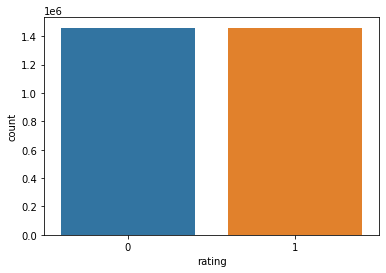

In [50]:
sns.countplot(x = train.rating)

In [ ]:
#both the categories are in almost same ratio. So the dataset is already balanced.

In [17]:
#importing stopwords to remove general terms
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 


stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
train.desc = train.desc.astype(str)

In [19]:
#defining functions for text cleaning
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
train['desc'] = train['desc'].apply(denoise_text)

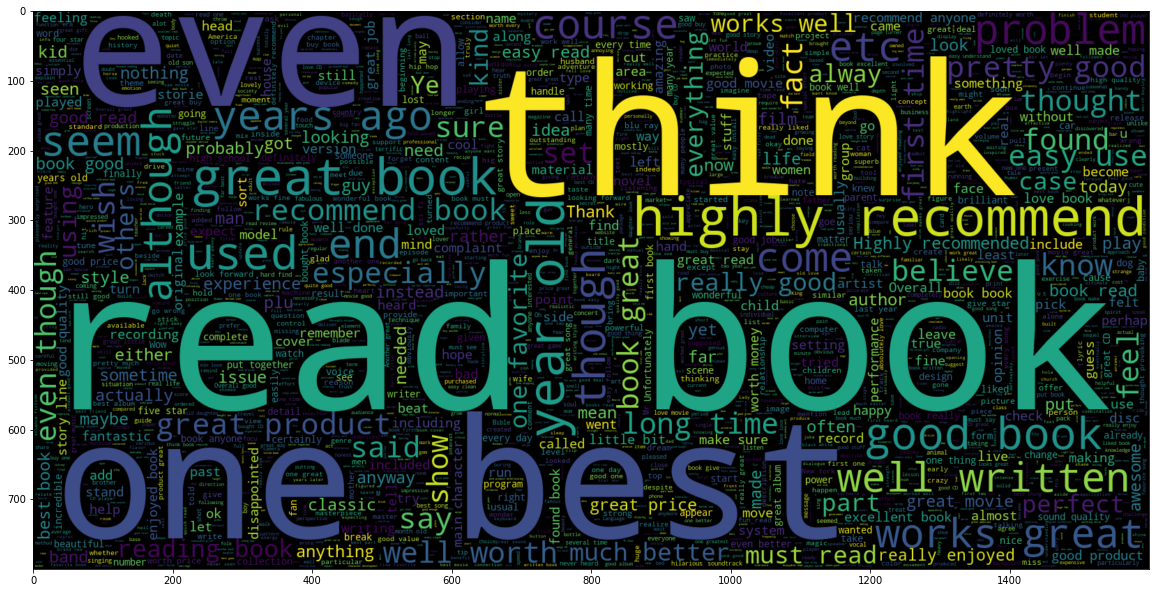

In [42]:
plt.figure(figsize = (20,20)) # positive reviews wordplot to spot frequent terms in postive reviews
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(train[train.rating == 1].desc))
plt.imshow(wc , interpolation = 'bilinear')

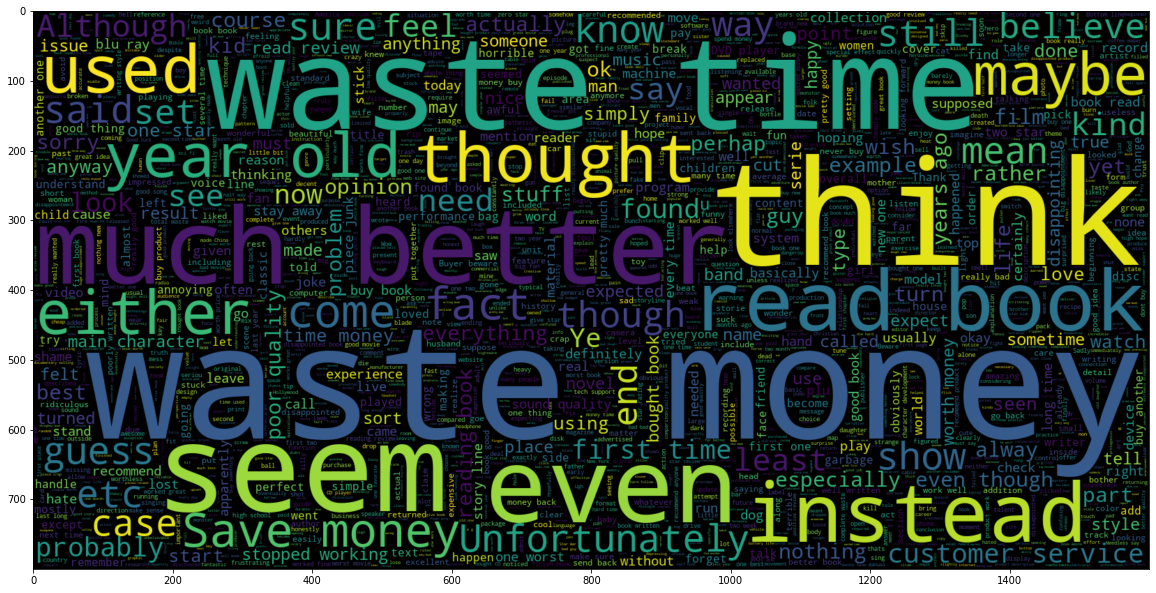

In [44]:
plt.figure(figsize = (20,20)) # negative reviews wordplot to spot frequent terms in negative reviews
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(train[train.rating == 0].desc))
plt.imshow(wc , interpolation = 'bilinear')

In [46]:
# No irrelevent word found in both the categories, (words that do not belong to their respective category)

In [20]:
#importing necessary modules for building a sequential model
from sklearn.preprocessing import LabelBinarizer
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,CuDNNLSTM
import tensorflow as tf

In [21]:
#splitting data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(train.desc,train.rating,random_state = 0)

In [22]:
max_features = 10000
maxlen = 300

In [23]:
#tokenizing data
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [24]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [25]:
#importing GloVe embedding file
EMBEDDING_FILE = 'D:\Downloads\Compressed\glove.twitter\glove.twitter.27B.1000d.txt'

In [26]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [27]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [28]:
#specifying values for our sequential model
batch_size = 256
epochs = 10
embed_size = 100

In [29]:
#importing module for reducing learning rate in case of training curve plateau
from keras.callbacks import ReduceLROnPlateau

In [30]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [31]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(CuDNNLSTM(units=128 , return_sequences = True ))
model.add(CuDNNLSTM(units=64 ))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
cu_dnnlstm (CuDNNLSTM)       (None, 300, 128)          117760    
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 64)                49664     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,169,537
Trainable params: 169,537
Non-trainable params: 1,000,000
_________________________________________________________________


In [33]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs)

Epoch 1/10
8555/8555 [==============================] - 1176s 136ms/step - loss: 0.2912 - accuracy: 0.8731 - val_loss: 0.2390 - val_accuracy: 0.9014
Epoch 2/10
8555/8555 [==============================] - 1210s 141ms/step - loss: 0.2326 - accuracy: 0.9050 - val_loss: 0.2330 - val_accuracy: 0.9043
Epoch 3/10
8555/8555 [==============================] - 1208s 141ms/step - loss: 0.2261 - accuracy: 0.9079 - val_loss: 0.2285 - val_accuracy: 0.9065
Epoch 4/10
8555/8555 [==============================] - 1210s 141ms/step - loss: 0.2207 - accuracy: 0.9104 - val_loss: 0.2275 - val_accuracy: 0.9077
Epoch 5/10
8555/8555 [==============================] - 1211s 142ms/step - loss: 0.2192 - accuracy: 0.9112 - val_loss: 0.2272 - val_accuracy: 0.9074
Epoch 6/10
8555/8555 [==============================] - 1208s 141ms/step - loss: 0.2160 - accuracy: 0.9126 - val_loss: 0.2269 - val_accuracy: 0.9088
Epoch 7/10
8555/8555 [==============================] - 1208s 141ms/step - loss: 0.2149 - accuracy: 0.9130

In [34]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

68438/68438 [==============================] - 2404s 35ms/step - loss: 0.2073 - accuracy: 0.9167
Accuracy of the model on Training Data is -  91.66904091835022
22813/22813 [==============================] - 773s 34ms/step - loss: 0.2228 - accuracy: 0.9097
Accuracy of the model on Testing Data is -  90.97479581832886


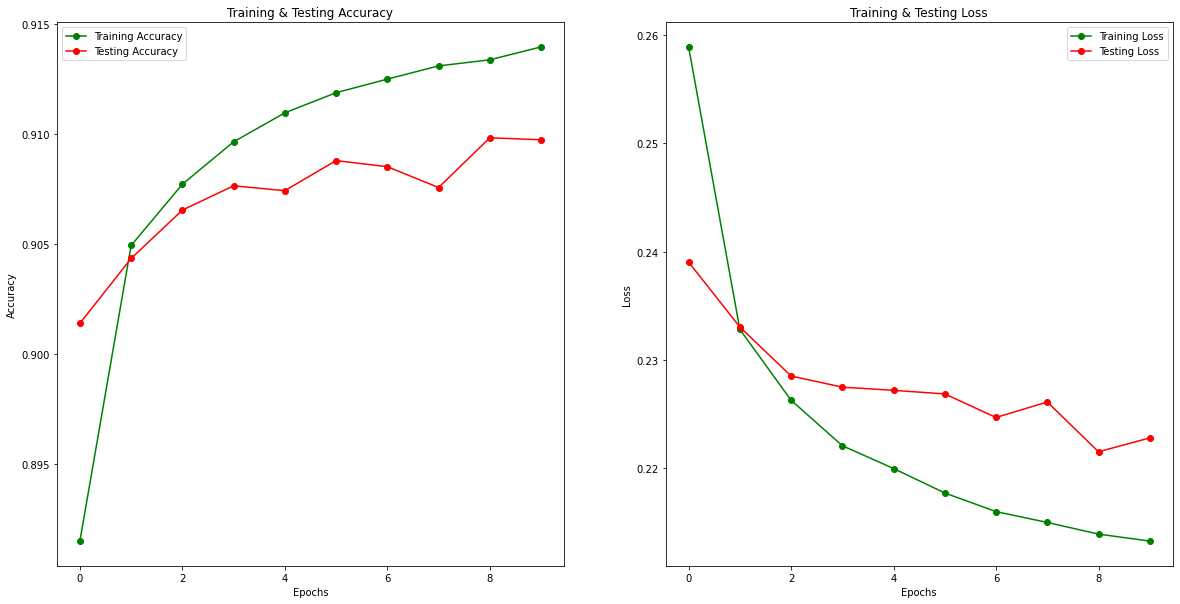

In [35]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [45]:
#no overfitting spotted as seen from above plots

In [36]:
pred = model.predict_classes(X_test)
pred[:5]

array([[0],
       [1],
       [1],
       [1],
       [1]])

In [37]:
print(classification_report(y_test, pred, target_names = ['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91    364397
    Positive       0.91      0.91      0.91    365603

    accuracy                           0.91    730000
   macro avg       0.91      0.91      0.91    730000
weighted avg       0.91      0.91      0.91    730000



In [38]:
cm = confusion_matrix(y_test,pred)
cm

array([[331520,  32877],
       [ 33007, 332596]], dtype=int64)

In [39]:
cm = pd.DataFrame(cm , index = ['Negative','Positive'] , columns = ['Negative','Positive'])

Text(69.0, 0.5, 'Predicted')

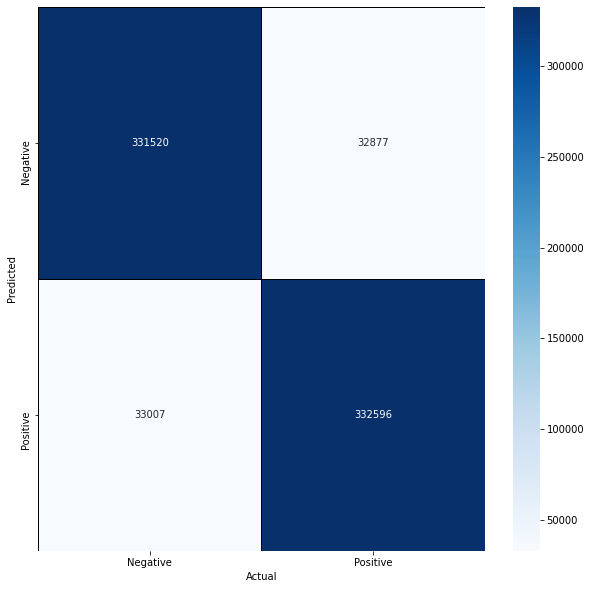

In [40]:
#plotting the confusion matrix obtained in previous steps
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Negative','Positive'] , yticklabels = ['Negative','Positive'])
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [41]:
# Suggestions to improve performance--
#1. Using UlmFit instead, for massively faster processing or even better results.
#2. Changing parameters of our sequential model.
#3. Ratings with 3 stars were removed, as they can be considered neutral. If they can be utilised it would be much better. 
#4. Using LSTM layer with recurrent dropout and other parameters instead of CuDNNLSTM for better results. (It would increase accuracy but massively decrease speed of model training on discrete GPU.)